<a href="https://colab.research.google.com/github/Fozan-webdev/Copy_of_Human_Activity_Recognition_with_Smartphones_99_Ac/blob/main/Copy_of_Human_Activity_Recognition_with_Smartphones_99_Acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uciml_human_activity_recognition_with_smartphones_path = kagglehub.dataset_download('uciml/human-activity-recognition-with-smartphones')

print('Data source import complete.')


Data source import complete.


# Import library

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv


# Load The train dataset

In [ ]:
df_train=pd.read_csv('/content/train.csv')

In [ ]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
df_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


# Now EDA Part Starting

In [ ]:
df_train.shape

(7352, 563)

In [ ]:
df_train.isnull().sum()

,0
tBodyAcc-mean()-X,0
tBodyAcc-mean()-Y,0
tBodyAcc-mean()-Z,0
tBodyAcc-std()-X,0
tBodyAcc-std()-Y,0
...,...
"angle(X,gravityMean)",0
"angle(Y,gravityMean)",0
"angle(Z,gravityMean)",0
subject,0


# Class Distribution

In [ ]:
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

# Now Visualize the class Distribution

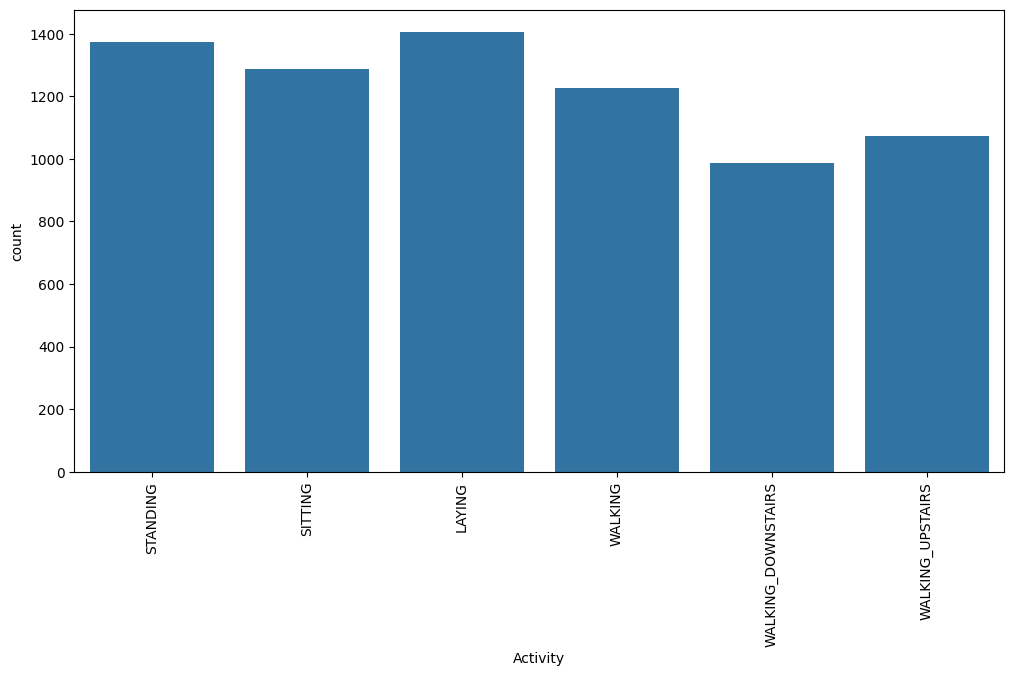

In [ ]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=df_train)
plt.xticks(x=df_train['Activity'],rotation='vertical')
plt.show()

# Now Subject Part

In [ ]:
df_train['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [ ]:
X=pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y=df_train.Activity.values.astype(object)

In [ ]:
X.shape , y.shape

((7352, 561), (7352,))

In [ ]:
X.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [ ]:
y[5]

'STANDING'

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [ ]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 561


# Transforming Non numerical Labels into numerical labels

In [ ]:
from sklearn import preprocessing

In [ ]:
encoder=preprocessing.LabelEncoder()

In [ ]:
encoder.fit(y)
y=encoder.transform(y)
y.shape

(7352,)

In [ ]:
y[5]

np.int64(2)

In [ ]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
encoder.classes_[5]

'WALKING_UPSTAIRS'

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
X[5]

array([ 0.03858209,  0.18617977,  0.07069885, -0.87339677, -0.95411711,
       -0.93313903, -0.86574842, -0.95349268, -0.94036321, -0.87026043,
       -0.91998157, -0.90402636,  0.89541301,  0.89700694,  0.84469288,
       -0.94612447, -0.69318798, -0.77564852, -0.69439636, -0.84298608,
       -0.93680911, -0.94257428, -1.38374823, -0.72462795, -1.04200642,
        1.65309439, -1.15596785,  0.8067426 ,  0.24705658,  1.11195951,
       -1.25380495,  1.25355661, -1.80151132,  1.91931057, -1.16349834,
        0.54422583,  0.68557071, -0.23365888,  0.12908098,  0.19571523,
        0.58798114, -0.42775638, -0.00578131, -0.44178683, -0.36158497,
       -0.56325767, -0.43948269, -0.35273651, -0.55726241,  0.56764117,
       -0.45408023, -0.0454745 ,  0.60795131, -0.39241834,  0.03841345,
       -0.82551143,  0.68035779, -0.54218921, -0.5518713 , -0.43341776,
       -0.32788833, -0.53895791, -0.91072978, -0.46503661, -0.79529628,
        0.99972428, -0.83832088,  0.6428776 , -0.42587111,  0.50

# Now Split X and y
# Training and Validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5881, 561), (1471, 561), (5881,), (1471,))

# Now Train The Model

1. SVM
2. Random Forest


In [ ]:

# import SVC classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Firstly SVM

# Run SVM with default hyperparameters

In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split X and y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)

# fit classifier to training set
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

# Default SVC Score

In [ ]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9748


# Now Some Hyperparameter where kernel use rbf and C=100.0

In [ ]:
svc2=SVC(kernel='rbf',C=100.0)


# fit classifier to training set
svc2.fit(X_train,y_train)

# make predictions on test set
y_pred2 = svc2.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)))

Model accuracy score with rbf kernel and C=100.0 : 0.9884


# Now Random Forest Classifier

In [ ]:
rand_clf=RandomForestClassifier(random_state=5)

In [ ]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=5)

In [ ]:
# compute and print accuracy score
rand_clf.score(X_test,y_test)

0.9809653297076818

# Hyperparameters of Random Forest Classifier:

# These are the parameters

1. max_depth: The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.
2. min_sample_split: Parameter that tells the decision tree in a random forest the minimum required number of observations in any given node to split it. Default = 2
3. max_leaf_nodes: This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree.
4. min_samples_leaf: This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node. Default = 1
5. n_estimators: Number of trees in the forest.
6. max_sample: The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree.
7. max_features: This resembles the number of maximum features provided to each tree in a random forest.
8. bootstrap: Method for sampling data points (with or without replacement). Default = True
9. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# Now, manually setting the hyperparameters, and using GridSearchCV for Hyperparameter Tuning:


In [ ]:
grid_param={
    'n_estimators':[90,100,115,130],
    'criterion':['gini','entropy'],
    'max_depth':range(2,20,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'max_features':['auto','log2']
}

In [ ]:
grid_search=GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [ ]:
#grid_search.fit(X_train,y_train)

In [ ]:
#grid_search.best_params_

In [ ]:
#rand_clf=RandomForestClassifier()